# Partie 1 


## 1 Shuffling du data set

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
acsincome_features = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ca_features.csv")
acsincome_labels = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ca_labels.csv")

sc = StandardScaler()


In [74]:
print(acsincome_features.head(10))
print(acsincome_features.shape)
print(acsincome_features.columns)


   AGEP  COW  SCHL  MAR    OCCP  POBP  RELP  WKHP  SEX  RAC1P
0  30.0  6.0  14.0  1.0  9610.0   6.0  16.0  40.0  1.0    8.0
1  21.0  4.0  16.0  5.0  1970.0   6.0  17.0  20.0  1.0    1.0
2  65.0  2.0  22.0  5.0  2040.0   6.0  17.0   8.0  1.0    1.0
3  33.0  1.0  14.0  3.0  9610.0  36.0  16.0  40.0  1.0    1.0
4  18.0  2.0  19.0  5.0  1021.0   6.0  17.0  18.0  2.0    1.0
5  17.0  1.0  15.0  5.0  4720.0  17.0  16.0  40.0  2.0    9.0
6  27.0  5.0  21.0  5.0  9825.0  18.0  17.0  50.0  1.0    1.0
7  19.0  1.0  18.0  5.0  4030.0   6.0  17.0  20.0  2.0    2.0
8  27.0  1.0  19.0  5.0  8740.0   6.0  17.0  30.0  1.0    1.0
9  19.0  5.0  16.0  5.0  9825.0  36.0  17.0  55.0  1.0    1.0
(195665, 10)
Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P'],
      dtype='object')


In [75]:
X_all , Y_all = shuffle(acsincome_features,acsincome_labels,random_state=3)
num_samples = int(len(X_all)*0.2)
X , Y = X_all[:num_samples] , Y_all[:num_samples]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [76]:
Y.head()

,PINCP
49441,True
140833,False
171091,True
90782,True
174594,False


## SVM 

In [84]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold  
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [85]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), X.columns)],
    remainder='passthrough'  
)

In [86]:
X_train_sc = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [87]:
model_SVC = SVC(kernel='rbf',random_state=1)
model_SVC.fit(X_train_sc,y_train.values.ravel())
training_score = model_SVC.score(X_train_sc,y_train.values.ravel())

In [88]:
print(f'Training score for SVC {training_score}')

Training score for SVC 0.8096357627176395


## Overfiting or underfiting ?

We can see the the score on the est set is inferior to the score on the training set, there is not a big difference but we can confirm that our model is slightly overvfitting

In [97]:
prediction_SVC = model_SVC.predict(X_test_transformed)
cm = confusion_matrix(y_test,prediction_SVC)
# X_male_features = X_all.iloc['sexe'=1] cf diapo 48

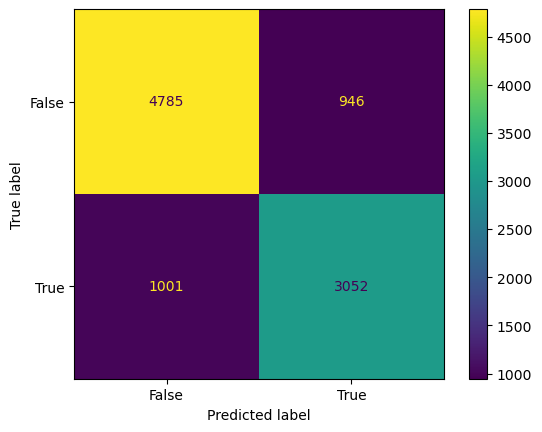

In [98]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Visualisation du rapport de classification
report_SVC = classification_report(y_test, prediction_SVC)
# Affichage du rapport de classification
print("Rapport de Classification SVC:\n", report_SVC)

Rapport de Classification SVC:
               precision    recall  f1-score   support

       False       0.83      0.83      0.83      5731
        True       0.76      0.75      0.76      4053

    accuracy                           0.80      9784
   macro avg       0.80      0.79      0.79      9784
weighted avg       0.80      0.80      0.80      9784



In [100]:
metrics.accuracy_score(y_test,prediction_SVC)

0.8010016353229763

## Performing a cross validation on SVC

In [102]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [103]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Validation Accuracy scores": results['test_accuracy'],
              }

In [104]:
accuracies = cross_validation(model_SVC,X_train_sc,y_train.values.ravel(),5)

In [18]:
print(accuracies)
y_pred = model_SVC.predict(X_test_transformed)

{'Training Accuracy scores': array([0.8105967 , 0.80910601, 0.80906342, 0.81098002, 0.80843271]), 'Validation Accuracy scores': array([0.79642249, 0.80306644, 0.80136286, 0.79659284, 0.80644062])}


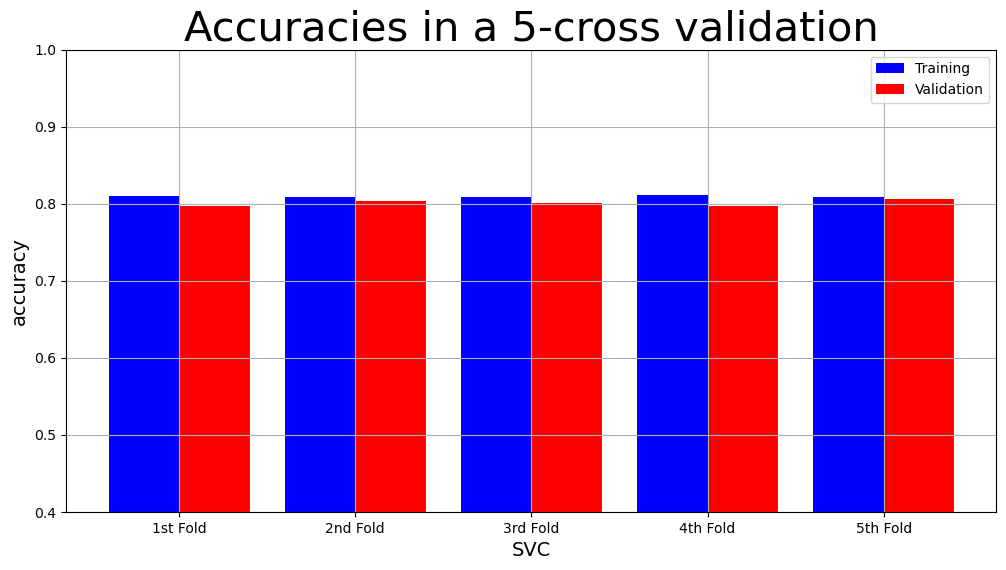

In [19]:
import numpy as np
## Make plotting for the k fold
model_name = 'SVC'
plot_result(model_name,'accuracy','Accuracies in a 5-cross validation',
            accuracies["Training Accuracy scores"],accuracies["Validation Accuracy scores"])

In [20]:
param_grid = {'C': [0.1, 10], 'gamma': [0.1,0.001],'kernel': ['poly', 'sigmoid']}
grid_SVC = GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=2) 

In [ ]:
grid_SVC.fit(X_train_sc,y_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  13.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  13.2s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  13.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  13.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  13.4s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  25.6s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  24.8s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  33.5s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  23.3s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  22.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=  17.8s
[CV] END ....................C=0.1, gamma=0.001, 

In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_SVC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_SVC.best_score_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, gamma=0.1, kernel='poly')

 The best score across ALL searched params:
 0.7945758718970086


In [91]:
best_CVS = SVC(C=10,gamma=0.1,kernel='poly')
best_CVS.fit(X_train_sc,y_train.values.ravel())
best_csv_pred = best_CVS.predict(X_test_transformed)
metrics.accuracy_score(y_test,best_csv_pred)

0.7895543744889616

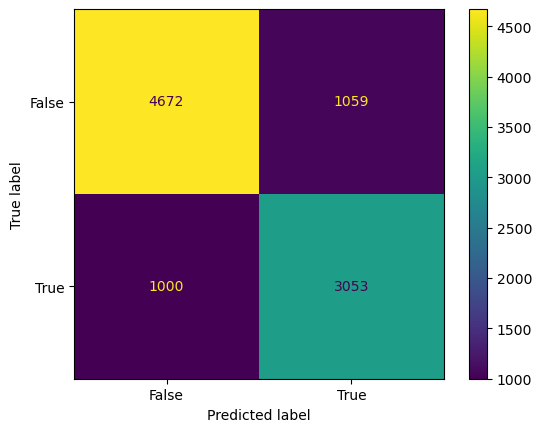

In [26]:
cm_best_SVC = metrics.confusion_matrix(y_test,best_csv_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_best_SVC, display_labels = [False, True])
cm_display.plot()
plt.show()

## Gradient Boosting

In [65]:
## Importing packages
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np


In [66]:
crossvalidation = KFold(n_splits = 5,shuffle=True,random_state=1)
for depth in range (1,10):
  tree_classifier = tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
  if tree_classifier.fit(X_train,y_train).tree_.max_depth < depth:
    break
  score = np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy',
                                  cv=crossvalidation,n_jobs=4))
  print(f"depth : {depth}, score : {score}")


depth : 1, score : 0.7176296419869862
depth : 2, score : 0.7508241357210561
depth : 3, score : 0.7539736558018972
depth : 4, score : 0.7727237765425045
depth : 5, score : 0.7876025384027777
depth : 6, score : 0.7934926963581935
depth : 7, score : 0.7958628127216419
depth : 8, score : 0.8017849340458406
depth : 9, score : 0.8027496055589163


In [67]:
GradientBooster = GradientBoostingClassifier()
#On teste avec différents paramètres 
#hyper_par = {'n_estimators':[1000,1500],
#             'learning_rate':[0.001,0.01],
#             'max_depth':[5,10],
#             'subsample':[0.5,1],
#             'random_state':[1]}

hyper_par = {'n_estimators':[1500],
            'learning_rate':[0.01],
             'max_depth':[5],
            'subsample':[0.5,],
            'random_state':[1]}
GB_search = GridSearchCV(estimator=GradientBooster,
                         param_grid=hyper_par,
                         scoring='accuracy',
                         n_jobs=4,
                         cv=crossvalidation)

In [68]:
GB_search.fit(X=X_train,y=y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.01], 'max_depth': [5],
                         'n_estimators': [1500], 'random_state': [1],
                         'subsample': [0.5]},
             scoring='accuracy')

In [70]:
print(GB_search.best_params_)
print(GB_search.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1500, 'random_state': 1, 'subsample': 0.5}
0.825569217621332


In [77]:
best_GB_model = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=1500,subsample=0.5)
best_GB_model.fit(X=X_train_sc,y=y_train.values.ravel())

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=1500,
                           subsample=0.5)

In [78]:
prediction_california_GB = best_GB_model.predict(X_test_transformed)
metrics.accuracy_score(y_test,prediction_california_GB)

0.821954210956664

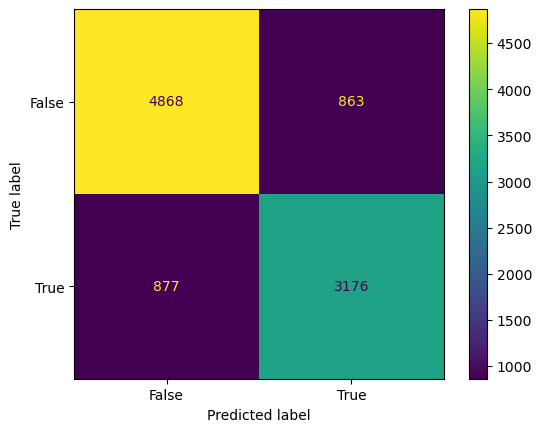

In [34]:
## Confusion Matrix using best GB
cm_best_GB = metrics.confusion_matrix(y_test,prediction_california_GB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_best_GB, display_labels = [False, True])
cm_display.plot()
plt.show()

In [35]:
report_california_GB = classification_report(y_test, prediction_california_GB)
# Affichage du rapport de classification
print("Rapport de Classification pour Gradient Boosting (Californie):\n", report_california_GB)

Rapport de Classification pour Gradient Boosting (Californie):
               precision    recall  f1-score   support

       False       0.85      0.85      0.85      5731
        True       0.79      0.78      0.78      4053

    accuracy                           0.82      9784
   macro avg       0.82      0.82      0.82      9784
weighted avg       0.82      0.82      0.82      9784



## Cross Validation on Gradient Boosting

In [36]:
accuracy_GB = cross_validation(best_GB_model,X_train_sc,y_train.values.ravel(),5)

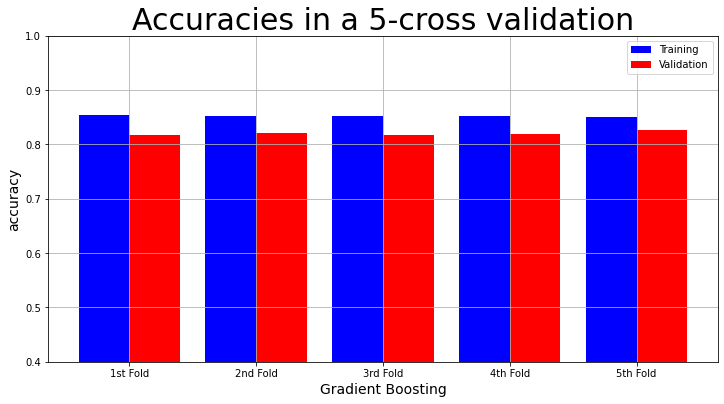

In [82]:
model_name = 'Gradient Boosting'
plot_result(model_name,'accuracy','Accuracies in a 5-cross validation',
            accuracy_GB["Training Accuracy scores"],accuracy_GB["Validation Accuracy scores"])

# Ranfom Forest 

In [10]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score,KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

In [11]:

X_all, Y_all = shuffle(acsincome_features, acsincome_labels, random_state=3)
num_samples = int(len(X_all) * 0.2)
X, Y = X_all[:num_samples], Y_all[:num_samples]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Modèle Random Forest
rf_model = RandomForestClassifier(random_state=0)


# Paramètres pour GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6]
}

# Configuration de la validation croisée
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=crossvalidation, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train.values.ravel())

# Meilleurs paramètres
print("Meilleurs Paramètres pour Random Forest:", grid_search_rf.best_params_)

# Évaluation sur l'ensemble de test avec le meilleur modèle
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Métriques d'évaluation
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Matrice de Confusion Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Rapport de Classification Random Forest:\n", classification_report(y_test, y_pred_rf))

Meilleurs Paramètres pour Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy Random Forest: 0.8076451349141456
Matrice de Confusion Random Forest:
 [[4839  892]
 [ 990 3063]]
Rapport de Classification Random Forest:
               precision    recall  f1-score   support

       False       0.83      0.84      0.84      5731
        True       0.77      0.76      0.76      4053

    accuracy                           0.81      9784
   macro avg       0.80      0.80      0.80      9784
weighted avg       0.81      0.81      0.81      9784



/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686:

Accuracy pour le Fold 1: 0.8037
Accuracy pour le Fold 2: 0.8026
Accuracy pour le Fold 3: 0.8024
Accuracy pour le Fold 4: 0.8017
Accuracy pour le Fold 5: 0.8138


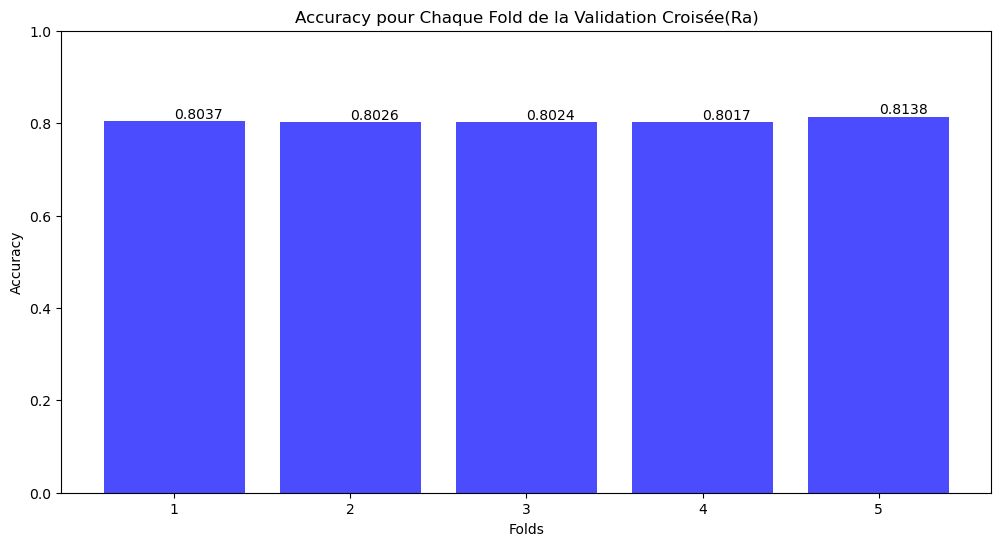

In [42]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
for i, score in enumerate(cv_scores, 1):
    print(f"Accuracy pour le Fold {i}: {score:.4f}")
    
# Création du graphique pour les résultats de la validation croisée

folds = np.arange(1, len(cv_scores) + 1)
plt.figure(figsize=(12, 6))
bars = plt.bar(folds, cv_scores, color='blue', alpha=0.7)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')  

plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy pour Chaque Fold de la Validation Croisée(Ra)')
plt.xticks(folds)
plt.ylim(0.0, 1.0)
plt.show()



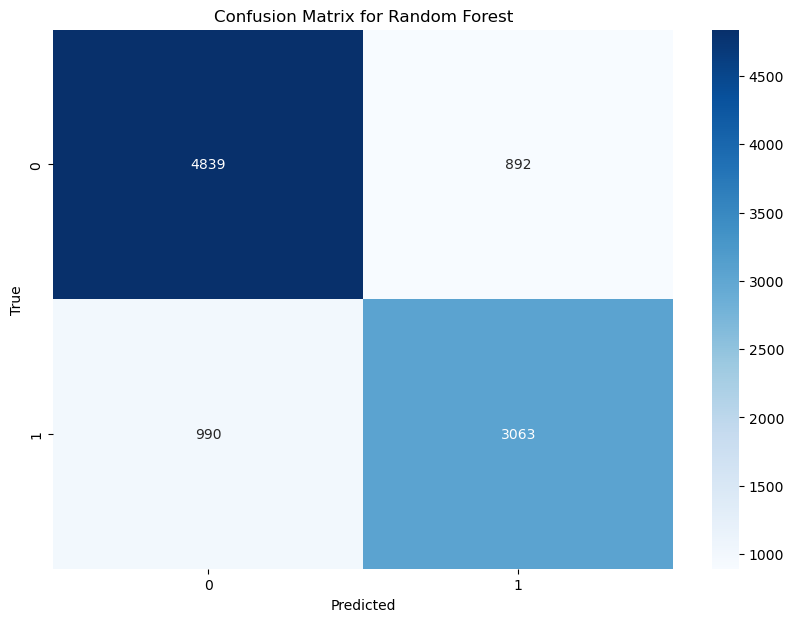

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


# Adaboost


In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada_model = AdaBoostClassifier()
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)
param_grid_ada = {
    'n_estimators': [200,250,300,350,400],
    'learning_rate': [0.01, 0.1, 1.0,1.5,2]
}
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

print(f"Meilleurs Paramètres pour AdaBoost: {grid_search_ada.best_params_}")
best_ada_model = grid_search_ada.best_estimator_

y_pred_ada = best_ada_model.predict(X_test)
print("Matrice de Confusion AdaBoost:\n", confusion_matrix(y_test, y_pred_ada))
print("Accuracy AdaBoost :", accuracy_score(y_test, y_pred_ada))
print("Rapport de Classification AdaBoost :\n", classification_report(y_test, y_pred_ada))

Meilleurs Paramètres pour AdaBoost: {'learning_rate': 1.5, 'n_estimators': 400}
Matrice de Confusion AdaBoost:
 [[4839  892]
 [ 910 3143]]
Accuracy AdaBoost : 0.8158217497955846
Rapport de Classification AdaBoost :
               precision    recall  f1-score   support

       False       0.84      0.84      0.84      5731
        True       0.78      0.78      0.78      4053

    accuracy                           0.82      9784
   macro avg       0.81      0.81      0.81      9784
weighted avg       0.82      0.82      0.82      9784



Accuracy pour le Fold 1: 0.8055
Accuracy pour le Fold 2: 0.8089
Accuracy pour le Fold 3: 0.8029
Accuracy pour le Fold 4: 0.8056
Accuracy pour le Fold 5: 0.8085


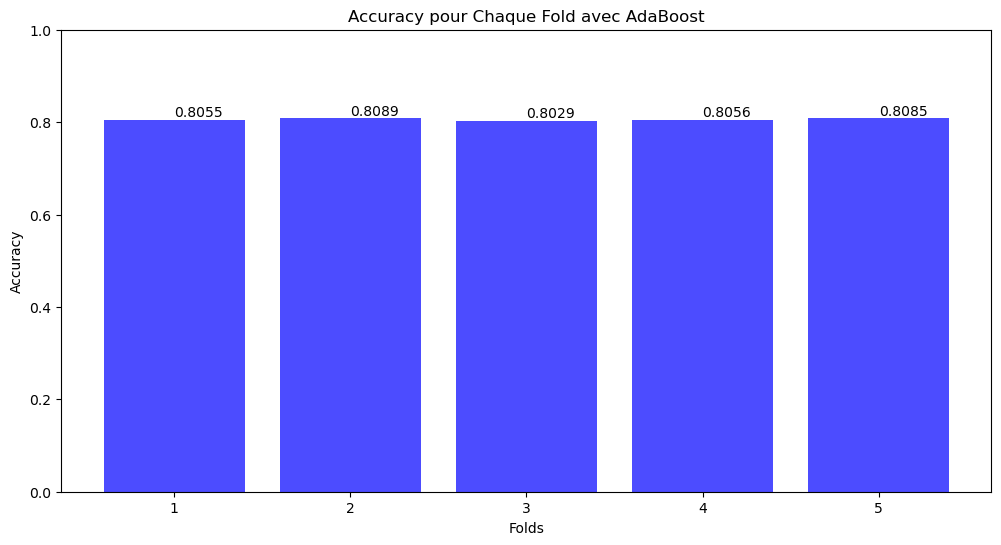

In [46]:
cv_scores = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='accuracy')
for i, score in enumerate(cv_scores, 1):
    print(f"Accuracy pour le Fold {i}: {score:.4f}")
    
    
folds = np.arange(1, len(cv_scores) + 1)
plt.figure(figsize=(12, 6))
bars = plt.bar(folds, cv_scores, color='blue', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')  


plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy pour Chaque Fold avec AdaBoost')
plt.xticks(folds)
plt.ylim(0.0, 1.0)
plt.show()

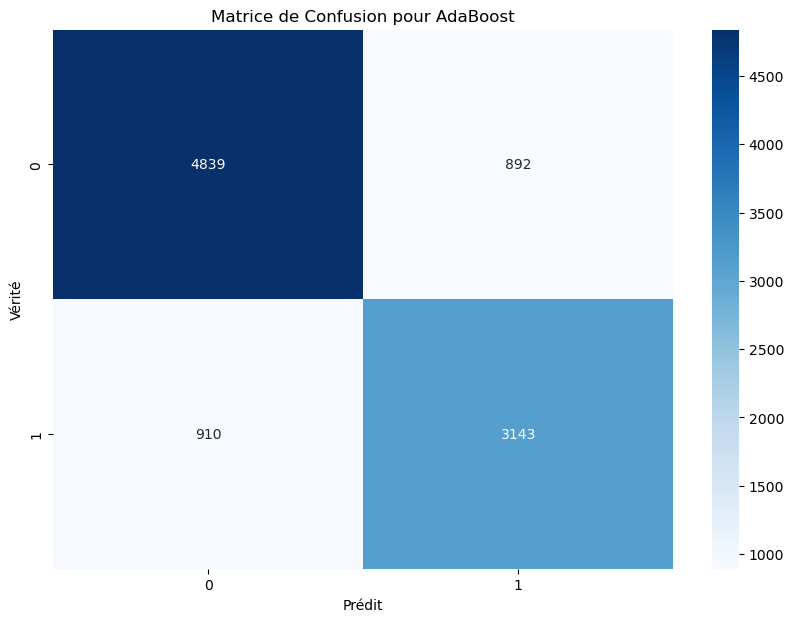

In [47]:

conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Création du graphique pour la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_ada, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Vérité')
plt.title('Matrice de Confusion pour AdaBoost')
plt.show()

# Taking a sample of both Data to evaluate our best models

# loading and scaling Nevada and Colorado data


In [48]:
##Nevada
Nevada_features = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ne_allfeaturesTP2.csv")
Nevada_labels = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ne_labelTP2.csv")
Nevada_features , Nevada_labels = shuffle(Nevada_features,Nevada_labels,random_state=1)

##colorado
Colorado_features = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_co_allfeaturesTP2.csv")
Colorado_labels = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_co_labelTP2.csv")
Colorado_features , Colorado_labels = shuffle(Nevada_features,Nevada_labels,random_state=1)

#### test on different percentage of the data set
num_samples = int(len(Nevada_features)*0.40)
X_nevada_test , Y_nevada_test= Nevada_features[:num_samples] , Nevada_labels[:num_samples]

num_samples2 = int(len(Colorado_features)*0.40)
X_colorado_test , Y_colorado_test = Colorado_features[:num_samples2] , Colorado_labels[:num_samples2]

In [49]:
X_nevada_sc = preprocessor.transform(X_nevada_test)
X_colorado_sc = preprocessor.transform(X_colorado_test)

In [50]:
prediction_nevada = best_CVS.predict(X_nevada_sc)
metrics.accuracy_score(Y_nevada_test,prediction_nevada)

0.7308762169680111

In [51]:
prediction_colorado = best_CVS.predict(X_colorado_sc)
metrics.accuracy_score(Y_colorado_test,prediction_colorado)

0.7285581826611034

In [52]:
#modèle Adaboost
y_pred_nevada = best_ada_model.predict(X_nevada_sc)
y_pred_colorado = best_ada_model.predict(X_colorado_sc)

print("Accuracy Adaboost Nevada :", accuracy_score(Y_nevada_test, y_pred_nevada))
print("Matrice de Confusion Nevada:\n", confusion_matrix(Y_nevada_test, y_pred_nevada))
print("Rapport de Classification Nevada :\n", classification_report(Y_nevada_test, y_pred_nevada))

print("Accuracy Adaboost Colorado :", accuracy_score(Y_colorado_test, y_pred_colorado))
print("Matrice de Confusion Colorado:\n", confusion_matrix(Y_colorado_test, y_pred_colorado))
print("Rapport de Classification Colorado :\n", classification_report(Y_colorado_test, y_pred_colorado))




Accuracy Adaboost Nevada : 0.7487250811312007
Matrice de Confusion Nevada:
 [[2096  837]
 [ 247 1134]]
Rapport de Classification Nevada :
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      2933
           1       0.58      0.82      0.68      1381

    accuracy                           0.75      4314
   macro avg       0.73      0.77      0.74      4314
weighted avg       0.79      0.75      0.76      4314

Accuracy Adaboost Colorado : 0.7461752433936022
Matrice de Confusion Colorado:
 [[2063  875]
 [ 220 1156]]
Rapport de Classification Colorado :
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      2938
           1       0.57      0.84      0.68      1376

    accuracy                           0.75      4314
   macro avg       0.74      0.77      0.73      4314
weighted avg       0.80      0.75      0.75      4314



In [53]:
#Modèle Random Forest 
y_pred_nevada_rf = best_rf_model.predict(X_nevada_sc)
print("Accuracy Random Forest Nevada:", accuracy_score(Y_nevada_test, y_pred_nevada_rf))
print("Matrice de Confusion Random Forest Nevada:\n", confusion_matrix(Y_nevada_test, y_pred_nevada_rf))
print("Rapport de Classification Random Forest Nevada:\n", classification_report(Y_nevada_test, y_pred_nevada_rf))

# Prédiction pour le Colorado
y_pred_colorado_rf = best_rf_model.predict(X_colorado_sc)
print("Accuracy Random Forest Colorado:", accuracy_score(Y_colorado_test, y_pred_colorado_rf))
print("Matrice de Confusion Random Forest Colorado:\n", confusion_matrix(Y_colorado_test, y_pred_colorado_rf))
print("Rapport de Classification Random Forest Colorado:\n", classification_report(Y_colorado_test, y_pred_colorado_rf))



Accuracy Random Forest Nevada: 0.7399165507649513
Matrice de Confusion Random Forest Nevada:
 [[2065  868]
 [ 254 1127]]
Rapport de Classification Random Forest Nevada:
               precision    recall  f1-score   support

           0       0.89      0.70      0.79      2933
           1       0.56      0.82      0.67      1381

    accuracy                           0.74      4314
   macro avg       0.73      0.76      0.73      4314
weighted avg       0.79      0.74      0.75      4314

Accuracy Random Forest Colorado: 0.7378303198887344
Matrice de Confusion Random Forest Colorado:
 [[2027  911]
 [ 220 1156]]
Rapport de Classification Random Forest Colorado:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      2938
           1       0.56      0.84      0.67      1376

    accuracy                           0.74      4314
   macro avg       0.73      0.77      0.73      4314
weighted avg       0.79      0.74      0.75      4314



In [54]:
#Gradient Boosting
#Effectuer des prédictions pour le Nevada
y_pred_nevada_GB = best_GB_model.predict(X_nevada_sc)
accuracy_nevada_GB = accuracy_score(Y_nevada_test, y_pred_nevada_GB)
conf_matrix_nevada_GB = confusion_matrix(Y_nevada_test, y_pred_nevada_GB)
report_nevada_GB = classification_report(Y_nevada_test, y_pred_nevada_GB)

# Afficher les résultats pour le Nevada
print("Accuracy Nevada (Gradient Boosting):", accuracy_nevada_GB)
print("Matrice de Confusion Nevada (Gradient Boosting):\n", conf_matrix_nevada_GB)
print("Rapport de Classification Nevada (Gradient Boosting):\n", report_nevada_GB)

# Effectuer des prédictions pour le Colorado

y_pred_colorado_GB = best_GB_model.predict(X_colorado_sc)
accuracy_colorado_GB = accuracy_score(Y_colorado_test, y_pred_colorado_GB)
conf_matrix_colorado_GB = confusion_matrix(Y_colorado_test, y_pred_colorado_GB)
report_colorado_GB = classification_report(Y_colorado_test, y_pred_colorado_GB)

# Afficher les résultats pour le Colorado
print("Accuracy Colorado (Gradient Boosting):", accuracy_colorado_GB)
print("Matrice de Confusion Colorado (Gradient Boosting):\n", conf_matrix_colorado_GB)
print("Rapport de Classification Colorado (Gradient Boosting):\n", report_colorado_GB)

Accuracy Nevada (Gradient Boosting): 0.74849327770051
Matrice de Confusion Nevada (Gradient Boosting):
 [[2067  866]
 [ 219 1162]]
Rapport de Classification Nevada (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      2933
           1       0.57      0.84      0.68      1381

    accuracy                           0.75      4314
   macro avg       0.74      0.77      0.74      4314
weighted avg       0.80      0.75      0.76      4314

Accuracy Colorado (Gradient Boosting): 0.7424663885025499
Matrice de Confusion Colorado (Gradient Boosting):
 [[2019  919]
 [ 192 1184]]
Rapport de Classification Colorado (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.69      0.78      2938
           1       0.56      0.86      0.68      1376

    accuracy                           0.74      4314
   macro avg       0.74      0.77      0.73      4314
weighted avg       0.

In [55]:
y_pred_nevada_SVM = best_CVS.predict(X_nevada_sc)
accuracy_nevada_SVM = accuracy_score(Y_nevada_test, y_pred_nevada_SVM)
conf_matrix_nevada_SVM = confusion_matrix(Y_nevada_test, y_pred_nevada_SVM)
report_nevada_SVM = classification_report(Y_nevada_test, y_pred_nevada_SVM)

# Affichage des résultats pour le Nevada
print("Accuracy Nevada (SVM):", accuracy_nevada_SVM)
print("Matrice de Confusion Nevada (SVM):\n", conf_matrix_nevada_SVM)
print("Rapport de Classification Nevada (SVM):\n", report_nevada_SVM)

# Prédictions et évaluations pour le Colorado
y_pred_colorado_SVM = best_CVS.predict(X_colorado_sc)
accuracy_colorado_SVM = accuracy_score(Y_colorado_test, y_pred_colorado_SVM)
conf_matrix_colorado_SVM = confusion_matrix(Y_colorado_test, y_pred_colorado_SVM)
report_colorado_SVM = classification_report(Y_colorado_test, y_pred_colorado_SVM)

# Affichage des résultats pour le Colorado
print("Accuracy Colorado (SVM):", accuracy_colorado_SVM)
print("Matrice de Confusion Colorado (SVM):\n", conf_matrix_colorado_SVM)
print("Rapport de Classification Colorado (SVM):\n", report_colorado_SVM)


Accuracy Nevada (SVM): 0.7308762169680111
Matrice de Confusion Nevada (SVM):
 [[2035  898]
 [ 263 1118]]
Rapport de Classification Nevada (SVM):
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      2933
           1       0.55      0.81      0.66      1381

    accuracy                           0.73      4314
   macro avg       0.72      0.75      0.72      4314
weighted avg       0.78      0.73      0.74      4314

Accuracy Colorado (SVM): 0.7285581826611034
Matrice de Confusion Colorado (SVM):
 [[1997  941]
 [ 230 1146]]
Rapport de Classification Colorado (SVM):
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      2938
           1       0.55      0.83      0.66      1376

    accuracy                           0.73      4314
   macro avg       0.72      0.76      0.72      4314
weighted avg       0.79      0.73      0.74      4314



# Part 2 : Bias


## Explicapibilité des models


### Corrélation entre features et labels sur le train


In [58]:
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

In [59]:
X_train.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX
82350,21.0,1.0,19.0,5.0,4720.0,6.0,2.0,99.0,1.0
23973,41.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0
92330,32.0,1.0,21.0,5.0,3245.0,6.0,2.0,10.0,2.0
115743,54.0,6.0,16.0,1.0,4220.0,130.0,1.0,45.0,2.0
82575,54.0,6.0,13.0,5.0,3602.0,6.0,0.0,36.0,1.0


In [60]:
y_train.head()

,PINCP
82350,False
23973,True
92330,False
115743,False
82575,False


In [72]:
joined_train_df = X_train.join(y_train)

In [73]:
joined_train_df.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
18292,45.0,1.0,21.0,1.0,1108.0,226.0,0.0,40.0,2.0,6.0,True
177110,25.0,3.0,21.0,5.0,5740.0,6.0,2.0,40.0,2.0,1.0,False
188045,23.0,1.0,19.0,5.0,7315.0,6.0,0.0,40.0,1.0,8.0,True
159836,27.0,1.0,16.0,1.0,6050.0,303.0,0.0,48.0,1.0,8.0,False
171162,38.0,6.0,19.0,1.0,9640.0,231.0,5.0,30.0,1.0,1.0,False


In [74]:
correlation = joined_train_df.corr()

<AxesSubplot:>

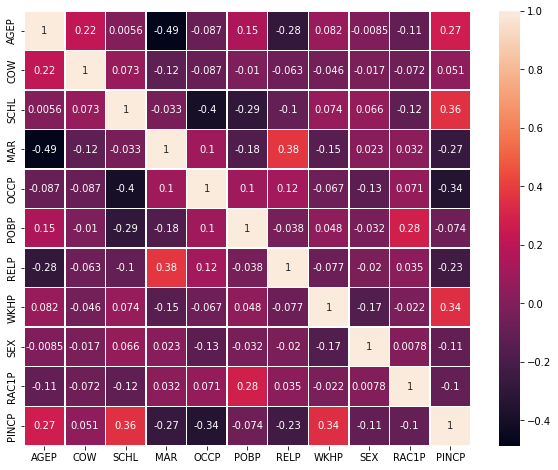

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,linewidths=0.5)

## Corrélation entre features et label prédit

In [137]:
X_test.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
193526,45.0,6.0,12.0,1.0,4251.0,303.0,0.0,40.0,1.0,1.0
79461,38.0,1.0,15.0,1.0,5350.0,6.0,1.0,30.0,1.0,1.0
138892,18.0,1.0,18.0,5.0,5400.0,32.0,2.0,20.0,2.0,1.0
144078,26.0,1.0,21.0,1.0,1010.0,6.0,0.0,40.0,2.0,9.0
21306,47.0,1.0,19.0,1.0,4230.0,164.0,0.0,40.0,2.0,1.0


In [80]:
y_test.head(10)

,PINCP
193526,False
79461,False
138892,False
144078,True
21306,True
134008,False
55349,True
96261,False
99131,True
67242,False


# Gradient boosting

In [79]:
y_test_GB = y_test.copy()
y_test_GB['PINCP'] = prediction_california_GB
prediction_DF_GB = X_test.join(y_test)
prediction_DF_GB.head(10)

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
193526,45.0,6.0,12.0,1.0,4251.0,303.0,0.0,40.0,1.0,1.0,False
79461,38.0,1.0,15.0,1.0,5350.0,6.0,1.0,30.0,1.0,1.0,False
138892,18.0,1.0,18.0,5.0,5400.0,32.0,2.0,20.0,2.0,1.0,False
144078,26.0,1.0,21.0,1.0,1010.0,6.0,0.0,40.0,2.0,9.0,True
21306,47.0,1.0,19.0,1.0,4230.0,164.0,0.0,40.0,2.0,1.0,True
134008,23.0,1.0,16.0,1.0,6260.0,523.0,12.0,60.0,1.0,7.0,False
55349,54.0,7.0,16.0,1.0,205.0,6.0,0.0,60.0,1.0,1.0,True
96261,28.0,1.0,20.0,1.0,4760.0,6.0,1.0,40.0,1.0,8.0,False
99131,38.0,3.0,22.0,1.0,2014.0,41.0,1.0,50.0,2.0,1.0,True
67242,20.0,3.0,19.0,5.0,2320.0,6.0,2.0,12.0,1.0,1.0,False


<Axes: >

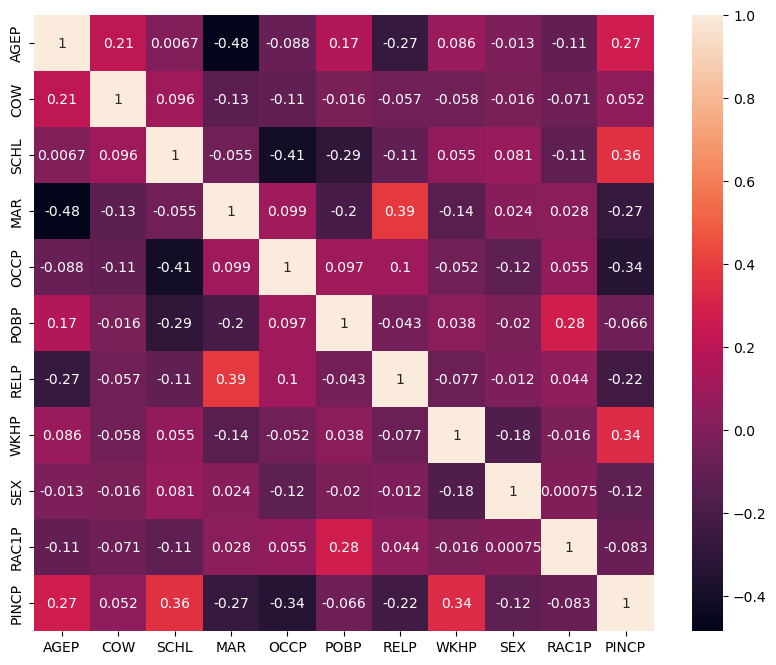

In [80]:
plt.figure(figsize=(10,8))
correlation_pred = prediction_DF_GB.corr()
sns.heatmap(correlation_pred,annot=True)

In [81]:
r_GB = permutation_importance(best_GB_model, X_test_transformed, y_test_GB,
                            n_repeats=10,
                            random_state=0)

Text(0.5, 1.0, 'Permutation Importance Gradient Boosting')

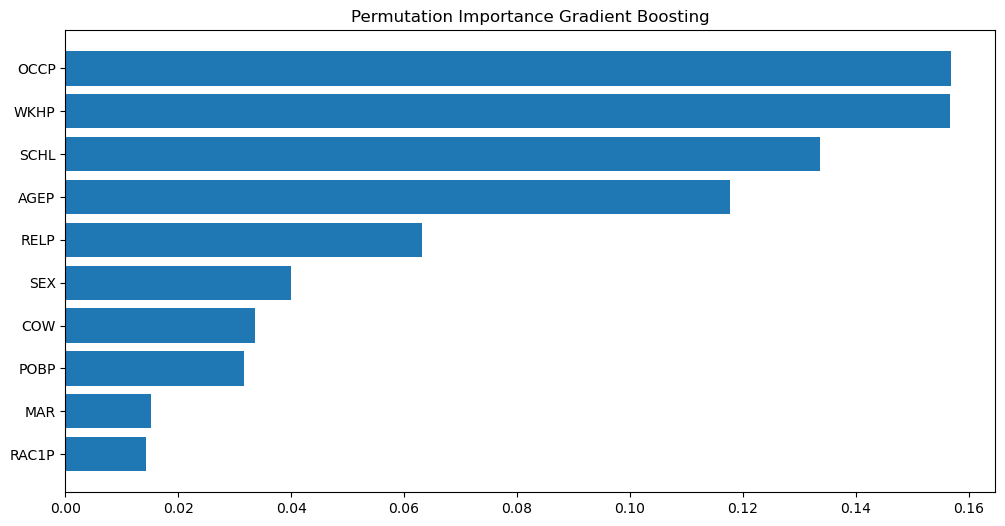

In [82]:
sorted_idx = r_GB.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r_GB.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance Gradient Boosting')

# SVC

In [105]:
best_CVS = SVC(C=10,gamma=0.1,kernel='poly',random_state=42)
best_CVS.fit(X_train_sc,y_train.values.ravel())
y_test_SVC = y_test.copy()
y_test_SVC['PINCP'] = best_csv_pred
prediction_DF_SVC = X_test.join(y_test)
prediction_DF_SVC.head(10)

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
193526,45.0,6.0,12.0,1.0,4251.0,303.0,0.0,40.0,1.0,1.0,False
79461,38.0,1.0,15.0,1.0,5350.0,6.0,1.0,30.0,1.0,1.0,False
138892,18.0,1.0,18.0,5.0,5400.0,32.0,2.0,20.0,2.0,1.0,False
144078,26.0,1.0,21.0,1.0,1010.0,6.0,0.0,40.0,2.0,9.0,True
21306,47.0,1.0,19.0,1.0,4230.0,164.0,0.0,40.0,2.0,1.0,True
134008,23.0,1.0,16.0,1.0,6260.0,523.0,12.0,60.0,1.0,7.0,False
55349,54.0,7.0,16.0,1.0,205.0,6.0,0.0,60.0,1.0,1.0,True
96261,28.0,1.0,20.0,1.0,4760.0,6.0,1.0,40.0,1.0,8.0,False
99131,38.0,3.0,22.0,1.0,2014.0,41.0,1.0,50.0,2.0,1.0,True
67242,20.0,3.0,19.0,5.0,2320.0,6.0,2.0,12.0,1.0,1.0,False


In [106]:
r = permutation_importance(best_CVS, X_test_transformed, y_test_SVC,
                            n_repeats=10,
                            random_state=0)

<Axes: >

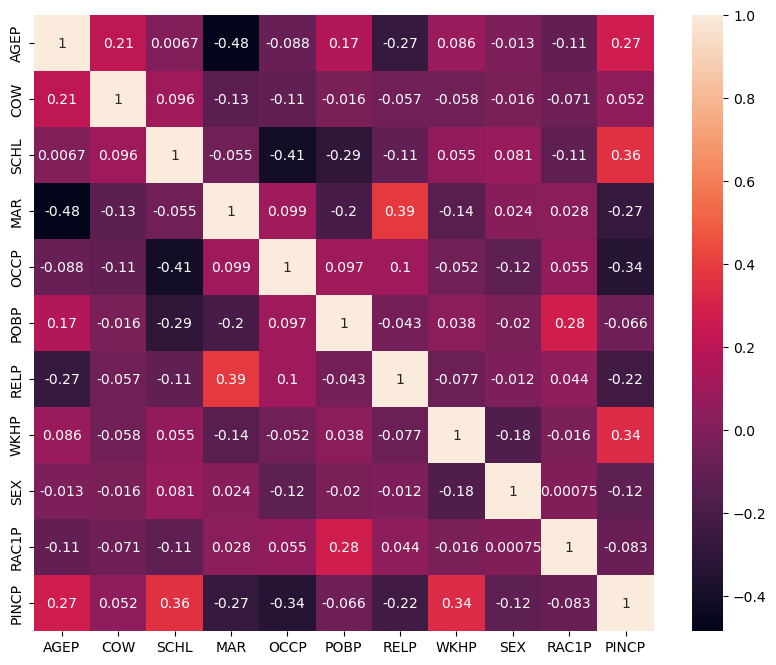

In [107]:
plt.figure(figsize=(10,8))
correlation_pred_SVC = prediction_DF_SVC.corr()
sns.heatmap(correlation_pred_SVC,annot=True)

Text(0.5, 1.0, 'Permutation Importance SVC')

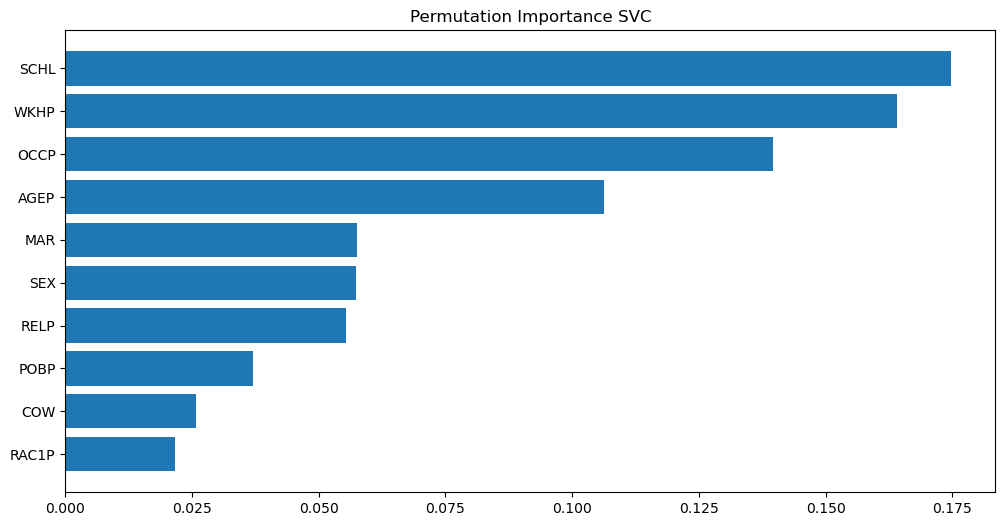

In [108]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance SVC')

# RandomForest & AdaBoost 

In [109]:
best_RandomForest = RandomForestClassifier(max_depth=10, min_samples_split= 2, n_estimators = 150)
best_AdaBoost = AdaBoostClassifier(learning_rate=1.5,n_estimators=400)

In [110]:
best_AdaBoost.fit(X_train_sc,y_train.values.ravel())
best_RandomForest.fit(X_train_sc,y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=150)

In [111]:
prediction_RandForest = best_RandomForest.predict(X_test_transformed)
prediction_AdaBoost = best_AdaBoost.predict(X_test_transformed)

In [112]:
y_test_RF = y_test.copy()
y_test_RF['PINCP'] = prediction_RandForest
prediction_DF_RF = X_test.join(y_test)
metrics.accuracy_score(y_test.values.ravel(),prediction_RandForest)

0.8112224039247752

In [113]:
y_test_AdaB = y_test.copy()
y_test_AdaB['PINCP'] = prediction_AdaBoost
prediction_DF_AdaB = X_test.join(y_test)
metrics.accuracy_score(y_test.values.ravel(),prediction_AdaBoost)

0.8158217497955846

# Correlation Matrix

<Axes: title={'center': 'correlation matrix for AdaBoost'}>

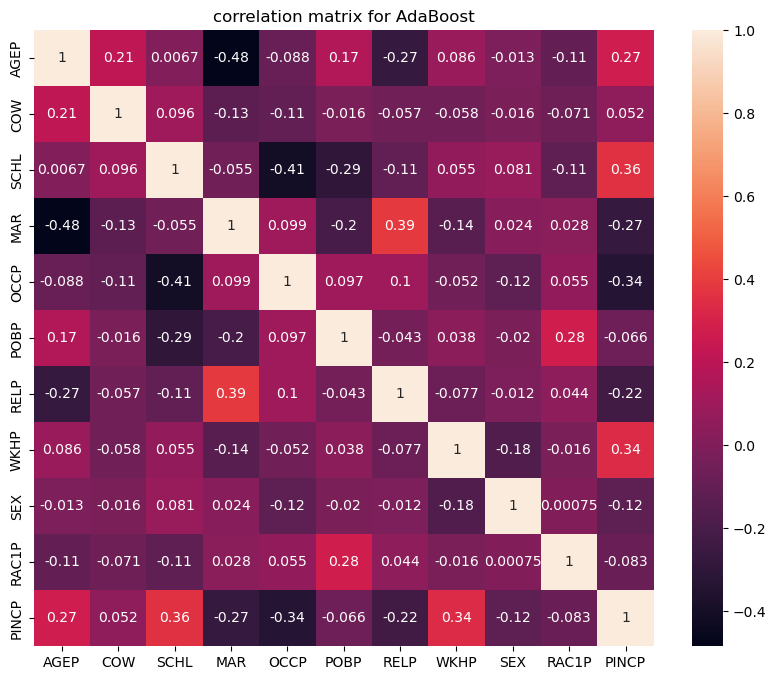

In [114]:
plt.figure(figsize=(10,8))
plt.title("correlation matrix for AdaBoost")
correlation_pred_AdaBoost = prediction_DF_AdaB.corr()
sns.heatmap(correlation_pred_AdaBoost,annot=True)

<Axes: title={'center': 'correlation matrix for Random Forest'}>

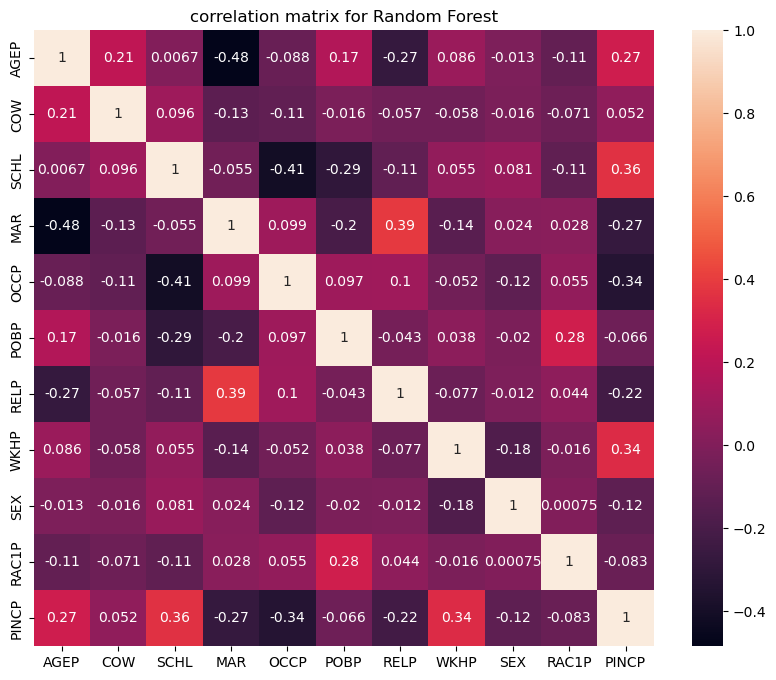

In [115]:
plt.figure(figsize=(10,8))
plt.title("correlation matrix for Random Forest")
correlation_pred_RF = prediction_DF_RF.corr()
sns.heatmap(correlation_pred_RF,annot=True)

In [116]:
r_RF = permutation_importance(best_RandomForest, X_test_transformed, y_test_RF,
                            n_repeats=10,
                            random_state=0)
r_AdaBoost = permutation_importance(best_AdaBoost, X_test_transformed, y_test_AdaB,
                            n_repeats=10,
                            random_state=0)

Text(0.5, 1.0, 'Permutation Importance Random Forest')

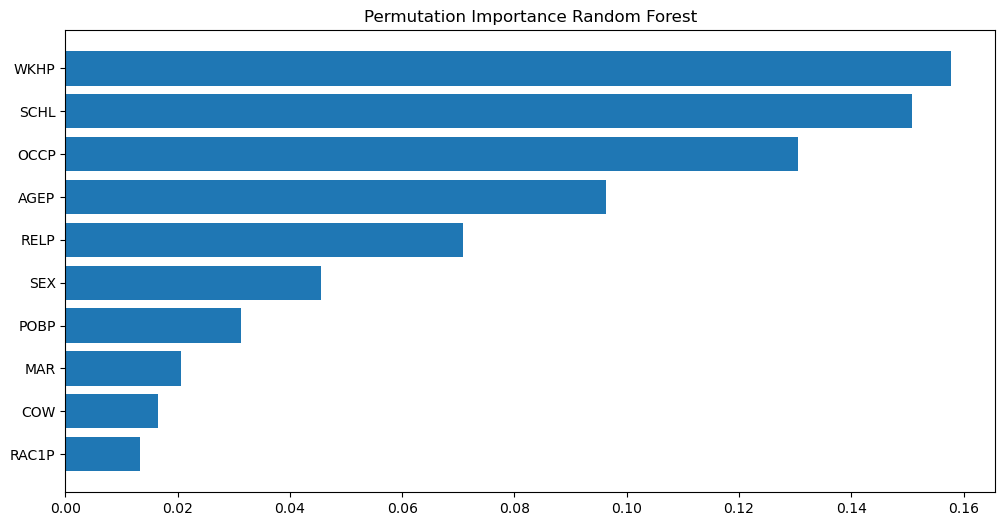

In [117]:
sorted_idx = r_RF.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r_RF.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance Random Forest')

Text(0.5, 1.0, 'Permutation Importance Ada Boost')

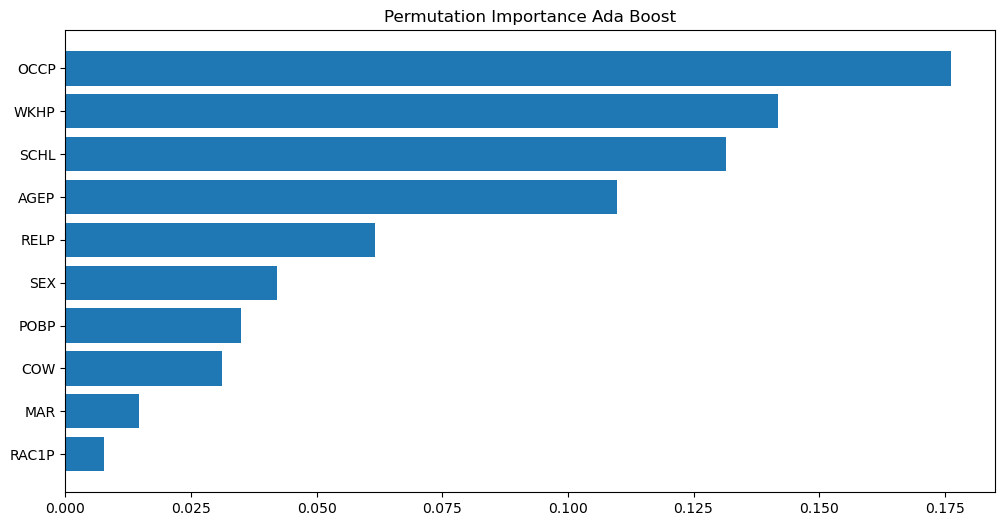

In [118]:
sorted_idx = r_AdaBoost.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r_AdaBoost.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance Ada Boost')

# Equité des modèles 

In [13]:
feature_withoutsex=pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ca_features_without_sex.csv")
features_withoutrace=pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ca_features_without_race.csv")
acsincome_labels = pd.read_csv("/home/srafik/Bureau/apprentissage_supervise/acsincome_ca_labels.csv")


In [14]:
acsincome_features = pd.DataFrame(acsincome_features)
acsincome_labels = pd.DataFrame(acsincome_labels)

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_all, Y_all = shuffle(acsincome_features, acsincome_labels, random_state=3)
num_samples = int(len(X_all) * 0.2)
X, Y = X_all[:num_samples], Y_all[:num_samples]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [16]:
#la colonne 8 contient la feature SEX
print(acsincome_features.head())
column_name = acsincome_features.columns[8]

X_train_male = X_train[X_train[column_name] == 1]
y_train_male = y_train[X_train[column_name] == 1].to_numpy().ravel()

X_train_female = X_train[X_train[column_name] == 2]
y_train_female = y_train[X_train[column_name] == 2].to_numpy().ravel()

X_test_male = X_test[X_test[column_name] == 1]
y_test_male = y_test[X_test[column_name] == 1].to_numpy().ravel()

X_test_female = X_test[X_test[column_name] == 2]
y_test_female = y_test[X_test[column_name] == 2].to_numpy().ravel()



   AGEP  COW  SCHL  MAR    OCCP  POBP  RELP  WKHP  SEX  RAC1P
0  30.0  6.0  14.0  1.0  9610.0   6.0  16.0  40.0  1.0    8.0
1  21.0  4.0  16.0  5.0  1970.0   6.0  17.0  20.0  1.0    1.0
2  65.0  2.0  22.0  5.0  2040.0   6.0  17.0   8.0  1.0    1.0
3  33.0  1.0  14.0  3.0  9610.0  36.0  16.0  40.0  1.0    1.0
4  18.0  2.0  19.0  5.0  1021.0   6.0  17.0  18.0  2.0    1.0


In [17]:
best_ada_model = AdaBoostClassifier(n_estimators=400, learning_rate=0.01)
best_ada_model.fit(X_train_male, y_train_male)
y_train_male = y_train_male.ravel()
y_test_male = y_test_male.ravel()

best_ada_model.fit(X_train_female, y_train_female)
y_train_female = y_train_female.ravel()
y_test_female = y_test_female.ravel()
# Prédiction pour les données de test Female
y_pred_ada_female = best_ada_model.predict(X_test_female)
y_pred_ada_male = best_ada_model.predict(X_test_male)
# Matrice de confusion pour les données de test masculines
cm_ada_male = confusion_matrix(y_test_male, y_pred_ada_male)

# Matrice de confusion pour les données de test féminines
cm_ada_female = confusion_matrix(y_test_female, y_pred_ada_female)

print("Matrice de Confusion Adaboost pour les Hommes :\n", cm_ada_male)
print("Matrice de Confusion Adaboost pour les Femmes :\n", cm_ada_female)



Matrice de Confusion Adaboost pour les Hommes :
 [[2584  224]
 [1149 1337]]
Matrice de Confusion Adaboost pour les Femmes :
 [[2615  308]
 [ 598  969]]


In [18]:
best_rf_model= RandomForestClassifier(max_depth= 10, min_samples_split= 2, n_estimators=150)
best_rf_model.fit(X_train_male, y_train_male)
y_train_male = y_train_male.ravel()
y_test_male = y_test_male.ravel()

# Utilisez le meilleur modèle Random Forest pour les données féminines
best_rf_model.fit(X_train_female, y_train_female)
y_train_female = y_train_female.ravel()
y_test_female = y_test_female.ravel()

# Prédiction pour les données de test masculines
y_pred_rf_male = best_rf_model.predict(X_test_male)

# Prédiction pour les données de test féminines
y_pred_rf_female = best_rf_model.predict(X_test_female)

# Matrice de confusion pour les données de test masculines
cm_rf_male = confusion_matrix(y_test_male, y_pred_rf_male)

# Matrice de confusion pour les données de test féminines
cm_rf_female = confusion_matrix(y_test_female, y_pred_rf_female)

print("Matrice de Confusion Random Forest pour les Hommes :\n", cm_rf_male)
print("Matrice de Confusion Random Forest pour les Femmes :\n", cm_rf_female)


Matrice de Confusion Random Forest pour les Hommes :
 [[2516  292]
 [ 920 1566]]
Matrice de Confusion Random Forest pour les Femmes :
 [[2557  366]
 [ 459 1108]]


In [19]:
best_GB_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=1500,
    random_state=1,
    subsample=0.5
)
best_GB_model.fit(X_train_male, y_train_male)
y_train_male = y_train_male.ravel()
y_test_male = y_test_male.ravel()


best_GB_model.fit(X_train_female, y_train_female)
y_train_female = y_train_female.ravel()
y_test_female = y_test_female.ravel()

# Prédiction pour les données de test masculines
y_pred_GB_male = best_GB_model.predict(X_test_male)

# Prédiction pour les données de test féminines
y_pred_GB_female = best_GB_model.predict(X_test_female)

# Matrice de confusion pour les données de test masculines
cm_gb_male = confusion_matrix(y_test_male, y_pred_GB_male)

# Matrice de confusion pour les données de test féminines
cm_gb_female = confusion_matrix(y_test_female, y_pred_GB_female)

print("Matrice de Confusion Gradient Boosting pour les Hommes :\n", cm_gb_male)
print("Matrice de Confusion Gradient Boosting pour les Femmes :\n", cm_gb_female)


Matrice de Confusion Gradient Boosting pour les Hommes :
 [[2473  335]
 [ 785 1701]]
Matrice de Confusion Gradient Boosting pour les Femmes :
 [[2537  386]
 [ 406 1161]]


In [ ]:
best_CVS = SVC(C=10,gamma=0.1,kernel='poly',random_state=42)
best_CVS.fit(X_train_male, y_train_male)
y_train_male = y_train_male.ravel()
y_test_male = y_test_male.ravel()

best_CVS.fit(X_train_female, y_train_female)
y_train_female = y_train_female.ravel()
y_test_female = y_test_female.ravel()

# Prédiction pour les données de test masculines
y_pred_SVM_male = best_CVS.predict(X_test_male)

# Prédiction pour les données de test féminines
y_pred_SVM_female = best_CVS.predict(X_test_female)

# Matrice de confusion pour les données de test masculines
cm_svm_male = confusion_matrix(y_test_male, y_pred_SVM_male)

# Matrice de confusion pour les données de test féminines
cm_svm_female = confusion_matrix(y_test_female, y_pred_SVM_female)

print("Matrice de Confusion SVM pour les Hommes :\n", cm_svm_male)
print("Matrice de Confusion SVM pour les Femmes :\n", cm_svm_female)


In [20]:
def calculate_fpr_tpr(cm):
    VN, FP = cm[0]
    FN, VP = cm[1]

    
    FPR = FP / (FP + VN) if (FP + VN) != 0 else 0

    TPR = VP / (VP + FN) if (VP + FN) != 0 else 0

    return FPR, TPR

In [22]:
fpr_tpr_ada_male = calculate_fpr_tpr(cm_ada_male)
fpr_tpr_ada_female = calculate_fpr_tpr(cm_ada_female)
fpr_tpr_rf_male = calculate_fpr_tpr(cm_rf_male)
fpr_tpr_rf_female = calculate_fpr_tpr(cm_rf_female)
fpr_tpr_gb_male = calculate_fpr_tpr(cm_gb_male)
fpr_tpr_gb_female= calculate_fpr_tpr(cm_gb_female)
print(fpr_tpr_ada_male)
print(fpr_tpr_ada_female)
print(fpr_tpr_rf_male)
print(fpr_tpr_rf_female)
print(fpr_tpr_gb_male)
print(fpr_tpr_gb_female)


(0.07977207977207977, 0.5378117457763475)
(0.10537119397878891, 0.618379068283344)
(0.10398860398860399, 0.6299275945293644)
(0.12521382141635307, 0.7070835992342055)
(0.1193019943019943, 0.6842316975060337)
(0.13205610673965104, 0.7409061901723037)


In [25]:
#Adaboost
best_ada_model = AdaBoostClassifier(n_estimators=400, learning_rate=0.01)
X_train, X_test, y_train, y_test = train_test_split(feature_withoutsex, acsincome_labels, test_size=0.2, random_state=42)

best_ada_model.fit(X_train, y_train.values.ravel())

# Prédiction sur l'ensemble de test
y_pred = best_ada_model.predict(X_test)

# Calcul de la matrice de confusion
cm_ada = confusion_matrix(y_test, y_pred)
print(cm_ada)

[[20149  2869]
 [ 5678 10437]]


In [65]:
#Modèle SVM
best_CVS = SVC(C=10,gamma=0.1,kernel='poly',random_state=42)
best_CVS.fit(X_train, y_train.values.ravel())

# Prédiction sur l'ensemble de test
y_pred_svm = best_CVS.predict(X_test)

# Calcul de la matrice de confusion pour le modèle SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Affichage de la matrice de confusion
print(cm_svm)

Accuracy: 0.7812621379070671
Precision: 0.7760841309228406
Recall: 0.6552928264990522
F1 Score: 0.7105917991993941
Confusion Matrix:
[[25081  3790]
 [ 6910 13136]]


In [26]:
#Modèle GradientBoosting
best_GB_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=1500,
    random_state=1,
    subsample=0.5
)
best_GB_model.fit(X_train, y_train.values.ravel())
y_pred_gb=best_GB_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)


[[19589  3429]
 [ 3404 12711]]


In [27]:
#Modèle RandomeForest 
#Entraînement du modèle Random Forest sur les données d'entraînement
best_rf_model= RandomForestClassifier(max_depth= 10, min_samples_split= 2, n_estimators=150)
best_rf_model.fit(X_train, y_train.values.ravel())

# Prédiction sur l'ensemble de test
y_pred_rf = best_rf_model.predict(X_test)

# Calcul de la matrice de confusion pour le modèle Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Affichage de la matrice de confusion
print(cm_rf)

[[19503  3515]
 [ 3836 12279]]


In [29]:
new_metric_ada = calculate_fpr_tpr(cm_ada)
new_metric_grad = calculate_fpr_tpr(cm_gb)
new_metric_rf = calculate_fpr_tpr(cm_rf)
print(new_metric_ada)
print(new_metric_grad)
print(new_metric_rf)


(0.12464158484664176, 0.647657461991933)
(0.14897037101398905, 0.788768228358672)
(0.15270657746111738, 0.7619609059882098)


In [35]:
column_name_rac1p = acsincome_features.columns[9] 
print(column_name_rac1p)


RAC1P


In [48]:
# Pour RAC1P = 1
X_train_racp_1 = X_train[X_train[column_name_rac1p] == 1]
y_train_racp_1 = y_train[X_train[column_name_rac1p] == 1].to_numpy().ravel()

X_test_racp_1 = X_test[X_test[column_name_rac1p] == 1]
y_test_racp_1 = y_test[X_test[column_name_rac1p] == 1].to_numpy().ravel()
# Exemple pour RACP = 2
X_train_racp_2 = X_train[X_train[column_name_rac1p] == 2]
y_train_racp_2 = y_train[X_train[column_name_rac1p] == 2].to_numpy().ravel()
X_test_racp_2 = X_test[X_test[column_name_rac1p] == 2]
y_test_racp_2 = y_test[X_test[column_name_rac1p] == 2].to_numpy().ravel()
# Exemple pour RACP = 3
X_train_racp_3 = X_train[X_train[column_name_rac1p] == 3]
y_train_racp_3 = y_train[X_train[column_name_rac1p] == 3].to_numpy().ravel()
X_test_racp_3 = X_test[X_test[column_name_rac1p] == 3]
y_test_racp_3 = y_test[X_test[column_name_rac1p] == 3].to_numpy().ravel()
# Exemple pour RACP = 4
X_train_racp_4 = X_train[X_train[column_name_rac1p] == 4]
y_train_racp_4 = y_train[X_train[column_name_rac1p] == 4].to_numpy().ravel()
X_test_racp_4= X_test[X_test[column_name_rac1p] == 4]
y_test_racp_4 = y_test[X_test[column_name_rac1p] == 4].to_numpy().ravel()
# Exemple pour RACP = 5
X_train_racp_5 = X_train[X_train[column_name_rac1p] == 5]
y_train_racp_5 = y_train[X_train[column_name_rac1p] == 5].to_numpy().ravel()
X_test_racp_5 = X_test[X_test[column_name_rac1p] == 5]
y_test_racp_5 = y_test[X_test[column_name_rac1p] == 5].to_numpy().ravel()
# Exemple pour RACP = 6
X_train_racp_6 = X_train[X_train[column_name_rac1p] == 6]
y_train_racp_6 = y_train[X_train[column_name_rac1p] ==6].to_numpy().ravel()
X_test_racp_6= X_test[X_test[column_name_rac1p] == 6]
y_test_racp_6 = y_test[X_test[column_name_rac1p] == 6].to_numpy().ravel()
# Exemple pour RACP = 7
X_train_racp_7 = X_train[X_train[column_name_rac1p] == 7]
y_train_racp_7 = y_train[X_train[column_name_rac1p] == 7].to_numpy().ravel()
X_test_racp_7 = X_test[X_test[column_name_rac1p] == 7]
y_test_racp_7 = y_test[X_test[column_name_rac1p] == 7].to_numpy().ravel()
# Exemple pour RACP = 8
X_train_racp_8 = X_train[X_train[column_name_rac1p] == 8]
y_train_racp_8 = y_train[X_train[column_name_rac1p] == 8].to_numpy().ravel()
X_test_racp_8 = X_test[X_test[column_name_rac1p] == 8]
y_test_racp_8 = y_test[X_test[column_name_rac1p] == 8].to_numpy().ravel()
# Exemple pour RACP = 9
X_train_racp_9 = X_train[X_train[column_name_rac1p] == 9]
y_train_racp_9 = y_train[X_train[column_name_rac1p] == 9].to_numpy().ravel()
X_test_racp_9 = X_test[X_test[column_name_rac1p] == 9]
y_test_racp_9 = y_test[X_test[column_name_rac1p] == 9].to_numpy().ravel()

In [49]:
best_ada_model = AdaBoostClassifier(n_estimators=400, learning_rate=0.01)
# Entraînement et prédiction pour 'RACE' = 1
best_ada_model.fit(X_train_racp_1, y_train_racp_1)
y_pred_ada_racp_1 = best_ada_model.predict(X_test_racp_1)
cm_ada_racp_1 = confusion_matrix(y_test_racp_1, y_pred_ada_racp_1)

# Entraînement et prédiction pour 'RACE' = 2
best_ada_model.fit(X_train_racp_2, y_train_racp_2)
y_pred_ada_racp_2 = best_ada_model.predict(X_test_racp_2)
cm_ada_racp_2 = confusion_matrix(y_test_racp_2, y_pred_ada_racp_2)
# Entraînement et prédiction pour 'RACE' = 3
best_ada_model.fit(X_train_racp_3, y_train_racp_3)
y_pred_ada_racp_3 = best_ada_model.predict(X_test_racp_3)
cm_ada_racp_3 = confusion_matrix(y_test_racp_3, y_pred_ada_racp_3)
# Entraînement et prédiction pour 'RACE' =4
best_ada_model.fit(X_train_racp_4, y_train_racp_4)
y_pred_ada_racp_4 = best_ada_model.predict(X_test_racp_4)
cm_ada_racp_4 = confusion_matrix(y_test_racp_4,y_pred_ada_racp_4)
# Entraînement et prédiction pour 'RACE' = 5
best_ada_model.fit(X_train_racp_5, y_train_racp_5)
y_pred_ada_racp_5 = best_ada_model.predict(X_test_racp_5)
cm_ada_racp_5 = confusion_matrix(y_test_racp_5, y_pred_ada_racp_5)
# Entraînement et prédiction pour 'RACE' = 6
best_ada_model.fit(X_train_racp_6, y_train_racp_6)
y_pred_ada_racp_6 = best_ada_model.predict(X_test_racp_6)
cm_ada_racp_6 = confusion_matrix(y_test_racp_6, y_pred_ada_racp_6)
# Entraînement et prédiction pour 'RACE' = 7
best_ada_model.fit(X_train_racp_7, y_train_racp_7)
y_pred_ada_racp_7 = best_ada_model.predict(X_test_racp_7)
cm_ada_racp_7 = confusion_matrix(y_test_racp_7, y_pred_ada_racp_7)
# Entraînement et prédiction pour 'RACE' = 8
best_ada_model.fit(X_train_racp_8, y_train_racp_8)
y_pred_ada_racp_8 = best_ada_model.predict(X_test_racp_8)
cm_ada_racp_8 = confusion_matrix(y_test_racp_8, y_pred_ada_racp_8)

# Entraînement et prédiction pour 'RACE' = 9
best_ada_model.fit(X_train_racp_9, y_train_racp_9)
y_pred_ada_racp_9 = best_ada_model.predict(X_test_racp_9)
cm_ada_racp_9 = confusion_matrix(y_test_racp_9, y_pred_ada_racp_9)
print("Matrice de Confusion Adaboost pour RACE = 1 :\n", cm_ada_racp_1)
print("Matrice de Confusion Adaboost pour RACE = 2 :\n", cm_ada_racp_2)
print("Matrice de Confusion Adaboost pour RACE = 3 :\n", cm_ada_racp_3)
print("Matrice de Confusion Adaboost pour RACE = 4 :\n", cm_ada_racp_4)
print("Matrice de Confusion Adaboost pour RACE = 5 :\n", cm_ada_racp_5)
print("Matrice de Confusion Adaboost pour RACE = 6 :\n", cm_ada_racp_6)
print("Matrice de Confusion Adaboost pour RACE = 7 :\n", cm_ada_racp_7)
print("Matrice de Confusion Adaboost pour RACE = 8 :\n", cm_ada_racp_8)
print("Matrice de Confusion Adaboost pour RACE = 9 :\n", cm_ada_racp_9)



Matrice de Confusion Adaboost pour RACE = 1 :
 [[11453  2020]
 [ 3228  7492]]
Matrice de Confusion Adaboost pour RACE = 2 :
 [[993 113]
 [287 280]]
Matrice de Confusion Adaboost pour RACE = 3 :
 [[177  11]
 [ 37  32]]
Matrice de Confusion Adaboost pour RACE = 4 :
 [[0 1]
 [2 0]]
Matrice de Confusion Adaboost pour RACE = 5 :
 [[60  2]
 [18  4]]
Matrice de Confusion Adaboost pour RACE = 6 :
 [[2651  815]
 [ 667 2547]]
Matrice de Confusion Adaboost pour RACE = 7 :
 [[83  4]
 [28  8]]
Matrice de Confusion Adaboost pour RACE = 8 :
 [[3601   23]
 [ 742  132]]
Matrice de Confusion Adaboost pour RACE = 9 :
 [[918  93]
 [226 385]]


In [50]:
best_rf_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=150)

# Entraînement et prédiction pour 'RACE' = 1
best_rf_model.fit(X_train_racp_1, y_train_racp_1)
y_pred_rf_racp_1 = best_rf_model.predict(X_test_racp_1)
cm_rf_racp_1 = confusion_matrix(y_test_racp_1, y_pred_rf_racp_1)
# Entraînement et prédiction pour 'RACE' = 2
best_rf_model.fit(X_train_racp_2, y_train_racp_2)
y_pred_rf_racp_2 = best_rf_model.predict(X_test_racp_2)
cm_rf_racp_2 = confusion_matrix(y_test_racp_2, y_pred_rf_racp_2)
# Entraînement et prédiction pour 'RACE' = 3
best_rf_model.fit(X_train_racp_3, y_train_racp_3)
y_pred_rf_racp_3 = best_rf_model.predict(X_test_racp_3)
cm_rf_racp_3 = confusion_matrix(y_test_racp_3, y_pred_rf_racp_3)
# Entraînement et prédiction pour 'RACE' = 4
best_rf_model.fit(X_train_racp_4, y_train_racp_4)
y_pred_rf_racp_4 = best_rf_model.predict(X_test_racp_4)
cm_rf_racp_4 = confusion_matrix(y_test_racp_4, y_pred_rf_racp_4)
# Entraînement et prédiction pour 'RACE' = 5
best_rf_model.fit(X_train_racp_5, y_train_racp_5)
y_pred_rf_racp_5 = best_rf_model.predict(X_test_racp_5)
cm_rf_racp_5 = confusion_matrix(y_test_racp_5, y_pred_rf_racp_5)
# Entraînement et prédiction pour 'RACE' = 6
best_rf_model.fit(X_train_racp_6, y_train_racp_6)
y_pred_rf_racp_6 = best_rf_model.predict(X_test_racp_6)
cm_rf_racp_6 = confusion_matrix(y_test_racp_6, y_pred_rf_racp_6)
# Entraînement et prédiction pour 'RACE' = 7
best_rf_model.fit(X_train_racp_7, y_train_racp_7)
y_pred_rf_racp_7 = best_rf_model.predict(X_test_racp_7)
cm_rf_racp_7 = confusion_matrix(y_test_racp_7, y_pred_rf_racp_7)
# Entraînement et prédiction pour 'RACE' = 8
best_rf_model.fit(X_train_racp_8, y_train_racp_8)
y_pred_rf_racp_8 = best_rf_model.predict(X_test_racp_8)
cm_rf_racp_8 = confusion_matrix(y_test_racp_8, y_pred_rf_racp_8)
# Entraînement et prédiction pour 'RACE' = 9
best_rf_model.fit(X_train_racp_9, y_train_racp_9)
y_pred_rf_racp_9 = best_rf_model.predict(X_test_racp_9)
cm_rf_racp_9 = confusion_matrix(y_test_racp_9, y_pred_rf_racp_9)

# Affichage des matrices de confusion
print("Matrice de Confusion Random Forest pour RACE = 1 :\n", cm_rf_racp_1)
print("Matrice de Confusion Random Forest pour RACE = 2 :\n", cm_rf_racp_2)
print("Matrice de Confusion Random Forest pour RACE = 3 :\n", cm_rf_racp_3)
print("Matrice de Confusion Random Forest pour RACE = 4 :\n", cm_rf_racp_4)
print("Matrice de Confusion Random Forest pour RACE = 5 :\n", cm_rf_racp_5)
print("Matrice de Confusion Random Forest pour RACE = 6 :\n", cm_rf_racp_6)
print("Matrice de Confusion Random Forest pour RACE = 7 :\n", cm_rf_racp_7)
print("Matrice de Confusion Random Forest pour RACE = 8 :\n", cm_rf_racp_8)
print("Matrice de Confusion Random Forest pour RACE = 9 :\n", cm_rf_racp_9)


Matrice de Confusion Random Forest pour RACE = 1 :
 [[10995  2478]
 [ 2109  8611]]
Matrice de Confusion Random Forest pour RACE = 2 :
 [[943 163]
 [209 358]]
Matrice de Confusion Random Forest pour RACE = 3 :
 [[172  16]
 [ 33  36]]
Matrice de Confusion Random Forest pour RACE = 4 :
 [[0 1]
 [2 0]]
Matrice de Confusion Random Forest pour RACE = 5 :
 [[57  5]
 [18  4]]
Matrice de Confusion Random Forest pour RACE = 6 :
 [[2779  687]
 [ 579 2635]]
Matrice de Confusion Random Forest pour RACE = 7 :
 [[77 10]
 [17 19]]
Matrice de Confusion Random Forest pour RACE = 8 :
 [[3507  117]
 [ 582  292]]
Matrice de Confusion Random Forest pour RACE = 9 :
 [[890 121]
 [151 460]]


In [51]:
best_GB_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=1500,
    random_state=1,
    subsample=0.5
)
# Entraînement et prédiction pour 'RACE' = 1
best_GB_model.fit(X_train_racp_1, y_train_racp_1)
y_pred_gb_racp_1 = best_GB_model.predict(X_test_racp_1)
cm_gb_racp_1 = confusion_matrix(y_test_racp_1, y_pred_gb_racp_1)
# Entraînement et prédiction pour 'RACE' = 2
best_GB_model.fit(X_train_racp_2, y_train_racp_2)
y_pred_gb_racp_2 = best_GB_model.predict(X_test_racp_2)
cm_gb_racp_2 = confusion_matrix(y_test_racp_2, y_pred_gb_racp_2)
# Entraînement et prédiction pour 'RACE' = 3
best_GB_model.fit(X_train_racp_3, y_train_racp_3)
y_pred_gb_racp_3 = best_GB_model.predict(X_test_racp_3)
cm_gb_racp_3 = confusion_matrix(y_test_racp_3, y_pred_gb_racp_3)
# Entraînement et prédiction pour 'RACE' = 4
best_GB_model.fit(X_train_racp_4, y_train_racp_4)
y_pred_gb_racp_4 = best_GB_model.predict(X_test_racp_4)
cm_gb_racp_4 = confusion_matrix(y_test_racp_4, y_pred_gb_racp_4)
# Entraînement et prédiction pour 'RACE' = 5
best_GB_model.fit(X_train_racp_5, y_train_racp_5)
y_pred_gb_racp_5 = best_GB_model.predict(X_test_racp_5)
cm_gb_racp_5 = confusion_matrix(y_test_racp_5, y_pred_gb_racp_5)
# Entraînement et prédiction pour 'RACE' = 6
best_GB_model.fit(X_train_racp_6, y_train_racp_6)
y_pred_gb_racp_6 = best_GB_model.predict(X_test_racp_6)
cm_gb_racp_6 = confusion_matrix(y_test_racp_6, y_pred_gb_racp_6)

# Entraînement et prédiction pour 'RACE' = 7
best_GB_model.fit(X_train_racp_7, y_train_racp_7)
y_pred_gb_racp_7 = best_GB_model.predict(X_test_racp_7)
cm_gb_racp_7 = confusion_matrix(y_test_racp_7, y_pred_gb_racp_7)

# Entraînement et prédiction pour 'RACE' = 8
best_GB_model.fit(X_train_racp_8, y_train_racp_8)
y_pred_gb_racp_8 = best_GB_model.predict(X_test_racp_8)
cm_gb_racp_8 = confusion_matrix(y_test_racp_8, y_pred_gb_racp_8)

# Entraînement et prédiction pour 'RACE' = 9
best_GB_model.fit(X_train_racp_9, y_train_racp_9)
y_pred_gb_racp_9 = best_GB_model.predict(X_test_racp_9)
cm_gb_racp_9 = confusion_matrix(y_test_racp_9, y_pred_gb_racp_9)

# Affichage des matrices de confusion
print("Matrice de Confusion Gradient Boosting pour RACE = 1 :\n", cm_gb_racp_1)
print("Matrice de Confusion Gradient Boosting pour RACE = 2 :\n", cm_gb_racp_2)
print("Matrice de Confusion Gradient Boosting pour RACE = 3 :\n", cm_gb_racp_3)
print("Matrice de Confusion Gradient Boosting pour RACE = 4 :\n", cm_gb_racp_4)
print("Matrice de Confusion Gradient Boosting pour RACE = 5 :\n", cm_gb_racp_5)
print("Matrice de Confusion Gradient Boosting pour RACE = 6 :\n", cm_gb_racp_6)
print("Matrice de Confusion Gradient Boosting pour RACE = 7 :\n", cm_gb_racp_7)
print("Matrice de Confusion Gradient Boosting pour RACE = 8 :\n", cm_gb_racp_8)
print("Matrice de Confusion Gradient Boosting pour RACE = 9 :\n", cm_gb_racp_9)

Matrice de Confusion Gradient Boosting pour RACE = 1 :
 [[11204  2269]
 [ 2010  8710]]
Matrice de Confusion Gradient Boosting pour RACE = 2 :
 [[950 156]
 [187 380]]
Matrice de Confusion Gradient Boosting pour RACE = 3 :
 [[169  19]
 [ 31  38]]
Matrice de Confusion Gradient Boosting pour RACE = 4 :
 [[0 1]
 [2 0]]
Matrice de Confusion Gradient Boosting pour RACE = 5 :
 [[57  5]
 [14  8]]
Matrice de Confusion Gradient Boosting pour RACE = 6 :
 [[2814  652]
 [ 541 2673]]
Matrice de Confusion Gradient Boosting pour RACE = 7 :
 [[75 12]
 [15 21]]
Matrice de Confusion Gradient Boosting pour RACE = 8 :
 [[3453  171]
 [ 512  362]]
Matrice de Confusion Gradient Boosting pour RACE = 9 :
 [[894 117]
 [144 467]]


In [52]:
#Calcul des metriques pour le gradient Boosting
# Calcul des métriques pour chaque valeur de 'RACE'
fpr_tpr_racp_1 = calculate_fpr_tpr(cm_gb_racp_1)
fpr_tpr_racp_2 = calculate_fpr_tpr(cm_gb_racp_2)
fpr_tpr_racp_3 = calculate_fpr_tpr(cm_gb_racp_3)
fpr_tpr_racp_4 = calculate_fpr_tpr(cm_gb_racp_4)
fpr_tpr_racp_5 = calculate_fpr_tpr(cm_gb_racp_5)
fpr_tpr_racp_6 = calculate_fpr_tpr(cm_gb_racp_6)
fpr_tpr_racp_7 = calculate_fpr_tpr(cm_gb_racp_7)
fpr_tpr_racp_8 = calculate_fpr_tpr(cm_gb_racp_8)
fpr_tpr_racp_9 = calculate_fpr_tpr(cm_gb_racp_9)


# Affichage des résultats
print("FPR et TPR pour RACE = 1 :", fpr_tpr_racp_1)
print("FPR et TPR pour RACE = 2 :", fpr_tpr_racp_2)
print("FPR et TPR pour RACE = 3 :", fpr_tpr_racp_3)
print("FPR et TPR pour RACE = 4 :", fpr_tpr_racp_4)
print("FPR et TPR pour RACE = 5 :", fpr_tpr_racp_5)
print("FPR et TPR pour RACE = 6 :", fpr_tpr_racp_6)
print("FPR et TPR pour RACE = 7 :", fpr_tpr_racp_7)
print("FPR et TPR pour RACE = 8 :", fpr_tpr_racp_1)
print("FPR et TPR pour RACE = 9 :", fpr_tpr_racp_2)

FPR et TPR pour RACE = 1 : (0.16841089586580568, 0.8125)
FPR et TPR pour RACE = 2 : (0.1410488245931284, 0.6701940035273368)
FPR et TPR pour RACE = 3 : (0.10106382978723404, 0.5507246376811594)
FPR et TPR pour RACE = 4 : (1.0, 0.0)
FPR et TPR pour RACE = 5 : (0.08064516129032258, 0.36363636363636365)
FPR et TPR pour RACE = 6 : (0.1881130986728217, 0.8316739265712508)
FPR et TPR pour RACE = 7 : (0.13793103448275862, 0.5833333333333334)
FPR et TPR pour RACE = 8 : (0.16841089586580568, 0.8125)
FPR et TPR pour RACE = 9 : (0.1410488245931284, 0.6701940035273368)


In [53]:
#Calcul des metriques pour Random Forest 
# Calcul des métriques pour chaque valeur de 'RACE'
# Calcul des métriques pour chaque valeur de 'RACE' avec Random Forest
fpr_tpr_rf_racp_1 = calculate_fpr_tpr(cm_rf_racp_1)
fpr_tpr_rf_racp_2 = calculate_fpr_tpr(cm_rf_racp_2)
fpr_tpr_rf_racp_3 = calculate_fpr_tpr(cm_rf_racp_3)
fpr_tpr_rf_racp_4 = calculate_fpr_tpr(cm_rf_racp_4)
fpr_tpr_rf_racp_5 = calculate_fpr_tpr(cm_rf_racp_5)
fpr_tpr_rf_racp_6 = calculate_fpr_tpr(cm_rf_racp_6)
fpr_tpr_rf_racp_7 = calculate_fpr_tpr(cm_rf_racp_7)
fpr_tpr_rf_racp_8 = calculate_fpr_tpr(cm_rf_racp_8)
fpr_tpr_rf_racp_9 = calculate_fpr_tpr(cm_rf_racp_9)
# Affichage des résultats pour Random Forest
print("FPR et TPR pour Random Forest RACE = 1 :", fpr_tpr_rf_racp_1)
print("FPR et TPR pour Random Forest RACE = 2 :", fpr_tpr_rf_racp_2)
print("FPR et TPR pour Random Forest RACE = 3 :", fpr_tpr_rf_racp_3)
print("FPR et TPR pour Random Forest RACE = 4 :", fpr_tpr_rf_racp_4)
print("FPR et TPR pour Random Forest RACE = 5 :", fpr_tpr_rf_racp_5)
print("FPR et TPR pour Random Forest RACE = 6 :", fpr_tpr_rf_racp_6)
print("FPR et TPR pour Random Forest RACE = 7 :", fpr_tpr_rf_racp_7)
print("FPR et TPR pour Random Forest RACE = 8 :", fpr_tpr_rf_racp_8)
print("FPR et TPR pour Random Forest RACE = 9 :", fpr_tpr_rf_racp_9)


FPR et TPR pour Random Forest RACE = 1 : (0.1839234023602761, 0.8032649253731343)
FPR et TPR pour Random Forest RACE = 2 : (0.14737793851717904, 0.6313932980599647)
FPR et TPR pour Random Forest RACE = 3 : (0.0851063829787234, 0.5217391304347826)
FPR et TPR pour Random Forest RACE = 4 : (1.0, 0.0)
FPR et TPR pour Random Forest RACE = 5 : (0.08064516129032258, 0.18181818181818182)
FPR et TPR pour Random Forest RACE = 6 : (0.19821119446047317, 0.8198506533914126)
FPR et TPR pour Random Forest RACE = 7 : (0.11494252873563218, 0.5277777777777778)
FPR et TPR pour Random Forest RACE = 8 : (0.03228476821192053, 0.3340961098398169)
FPR et TPR pour Random Forest RACE = 9 : (0.11968348170128586, 0.7528641571194763)


In [54]:
# Calcul des métriques pour chaque valeur de 'RACE' avec AdaBoost
fpr_tpr_ada_racp_1 = calculate_fpr_tpr(cm_ada_racp_1)
fpr_tpr_ada_racp_2 = calculate_fpr_tpr(cm_ada_racp_2)
fpr_tpr_ada_racp_3 = calculate_fpr_tpr(cm_ada_racp_3)
fpr_tpr_ada_racp_4 = calculate_fpr_tpr(cm_ada_racp_4)
fpr_tpr_ada_racp_5 = calculate_fpr_tpr(cm_ada_racp_5)
fpr_tpr_ada_racp_6 = calculate_fpr_tpr(cm_ada_racp_6)
fpr_tpr_ada_racp_7 = calculate_fpr_tpr(cm_ada_racp_7)
fpr_tpr_ada_racp_8 = calculate_fpr_tpr(cm_ada_racp_8)
fpr_tpr_ada_racp_9 = calculate_fpr_tpr(cm_ada_racp_9)

# Affichage des résultats pour AdaBoost
print("FPR et TPR pour AdaBoost RACE = 1 :", fpr_tpr_ada_racp_1)
print("FPR et TPR pour AdaBoost RACE = 2 :", fpr_tpr_ada_racp_2)
print("FPR et TPR pour AdaBoost RACE = 3 :", fpr_tpr_ada_racp_3)
print("FPR et TPR pour AdaBoost RACE = 4 :", fpr_tpr_ada_racp_4)
print("FPR et TPR pour AdaBoost RACE = 5 :", fpr_tpr_ada_racp_5)
print("FPR et TPR pour AdaBoost RACE = 6 :", fpr_tpr_ada_racp_6)
print("FPR et TPR pour AdaBoost RACE = 7 :", fpr_tpr_ada_racp_7)
print("FPR et TPR pour AdaBoost RACE = 8 :", fpr_tpr_ada_racp_8)
print("FPR et TPR pour AdaBoost RACE = 9 :", fpr_tpr_ada_racp_9)


FPR et TPR pour AdaBoost RACE = 1 : (0.14992948860684333, 0.6988805970149253)
FPR et TPR pour AdaBoost RACE = 2 : (0.10216998191681737, 0.49382716049382713)
FPR et TPR pour AdaBoost RACE = 3 : (0.05851063829787234, 0.463768115942029)
FPR et TPR pour AdaBoost RACE = 4 : (1.0, 0.0)
FPR et TPR pour AdaBoost RACE = 5 : (0.03225806451612903, 0.18181818181818182)
FPR et TPR pour AdaBoost RACE = 6 : (0.2351413733410271, 0.7924704418170504)
FPR et TPR pour AdaBoost RACE = 7 : (0.04597701149425287, 0.2222222222222222)
FPR et TPR pour AdaBoost RACE = 8 : (0.0063465783664459164, 0.15102974828375287)
FPR et TPR pour AdaBoost RACE = 9 : (0.09198813056379822, 0.630114566284779)


In [55]:
#ON utilise cette fois les features sans race 
X_train, X_test, y_train, y_test = train_test_split(features_withoutrace, acsincome_labels, test_size=0.2, random_state=42)
best_ada_model = AdaBoostClassifier(n_estimators=400, learning_rate=0.01)
best_ada_model.fit(X_train, y_train.values.ravel())

y_pred_ada = best_ada_model.predict(X_test)
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Matrice de confusion pour AdaBoost sans 'RACE':\n", cm_ada)
fpr_ada, tpr_ada = calculate_fpr_tpr(cm_ada)
print("FPR pour AdaBoost sans 'RACE':", fpr_ada)
print("TPR pour AdaBoost sans 'RACE':", tpr_ada)


Matrice de confusion pour AdaBoost sans 'RACE':
 [[20149  2869]
 [ 5678 10437]]
FPR pour AdaBoost sans 'RACE': 0.12464158484664176
TPR pour AdaBoost sans 'RACE': 0.647657461991933


In [56]:
best_GB_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=1500,
    random_state=1,
    subsample=0.5
)
best_GB_model.fit(X_train, y_train.values.ravel())
y_pred_gb = best_GB_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Matrice de confusion pour Gradient Boosting sans 'RACE':\n", cm_gb)
fpr_gb, tpr_gb = calculate_fpr_tpr(cm_gb)
print("FPR pour Gradient Boosting sans 'RACE':", fpr_gb)
print("TPR pour Gradient Boosting sans 'RACE':", tpr_gb)


Matrice de confusion pour Gradient Boosting sans 'RACE':
 [[19596  3422]
 [ 3410 12705]]
FPR pour Gradient Boosting sans 'RACE': 0.14866626118689721
TPR pour Gradient Boosting sans 'RACE': 0.78839590443686


In [57]:
best_rf_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=150)
best_rf_model.fit(X_train, y_train.values.ravel())
y_pred_rf = best_rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion pour Random Forest sans 'RACE':\n", cm_rf)
fpr_rf, tpr_rf = calculate_fpr_tpr(cm_rf)
print("FPR pour Random Forest sans 'RACE':", fpr_rf)
print("TPR pour Random Forest sans 'RACE':", tpr_rf)


Matrice de confusion pour Random Forest sans 'RACE':
 [[19554  3464]
 [ 3826 12289]]
FPR pour Random Forest sans 'RACE': 0.15049092014944826
TPR pour Random Forest sans 'RACE': 0.7625814458578963
